# Importing Libraries

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint

# Import Data

In [56]:
tabular_data = pd.read_csv("C:\\Users\\User\\Desktop\\IAT360_final_dataset\\HAM10000_metadata.csv")
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [57]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\IAT360_final_dataset\\hmnist_28_28_RGB.csv")
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [58]:
x = data.drop('label', axis=1)
y = data['label']

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

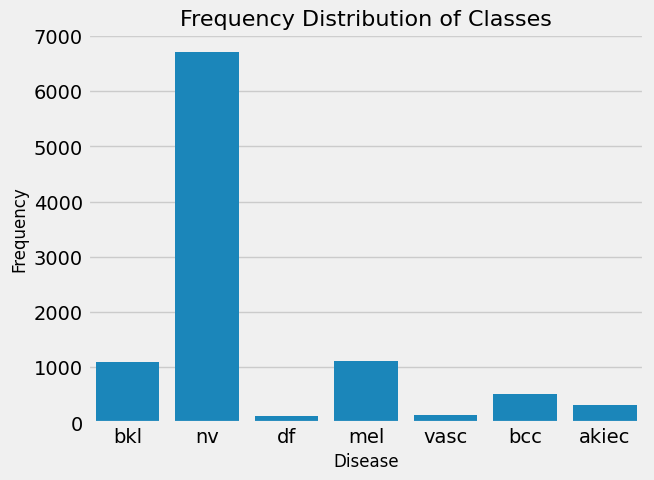

In [59]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

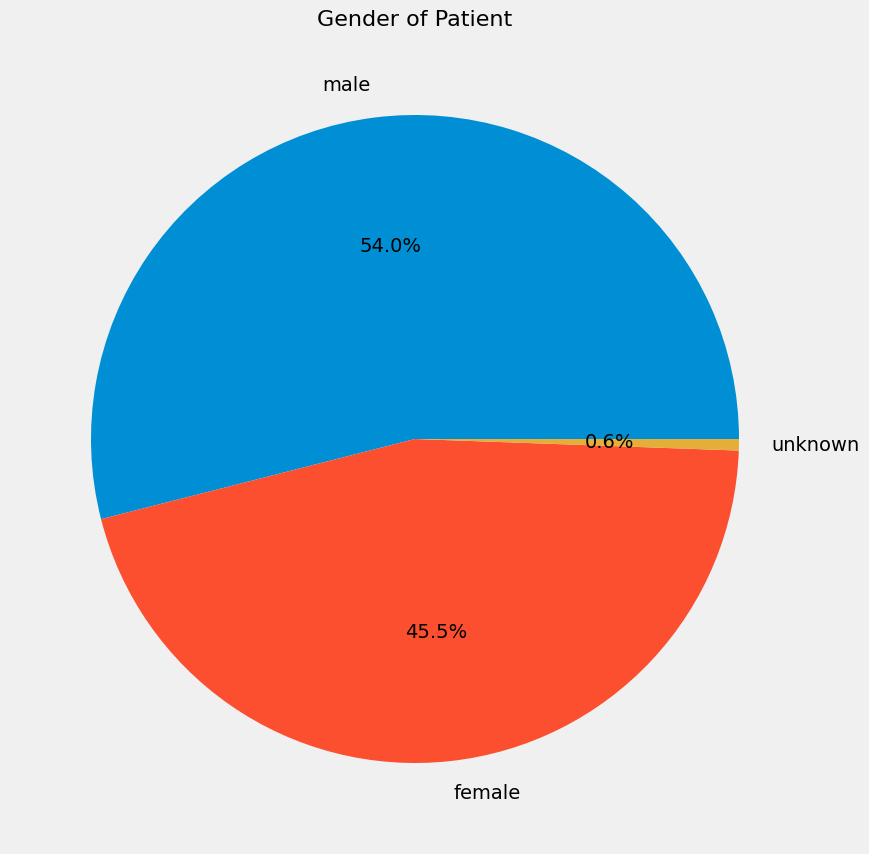

In [60]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

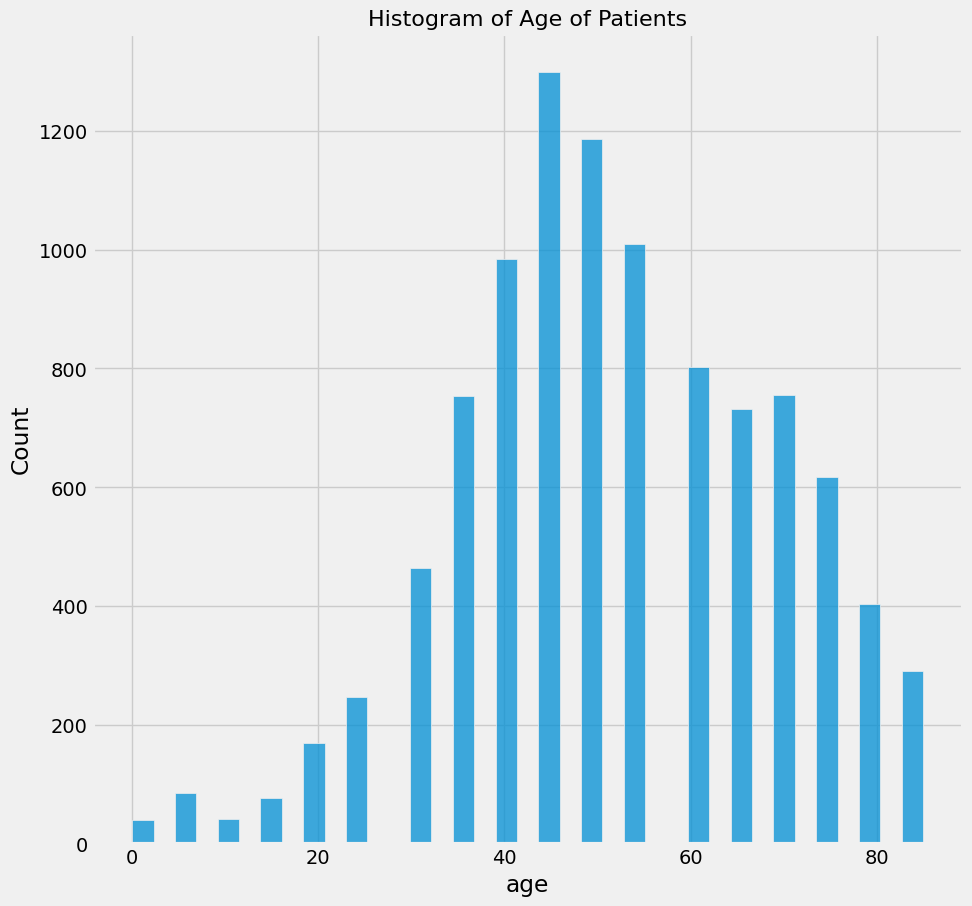

In [61]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of Disease over Gender

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

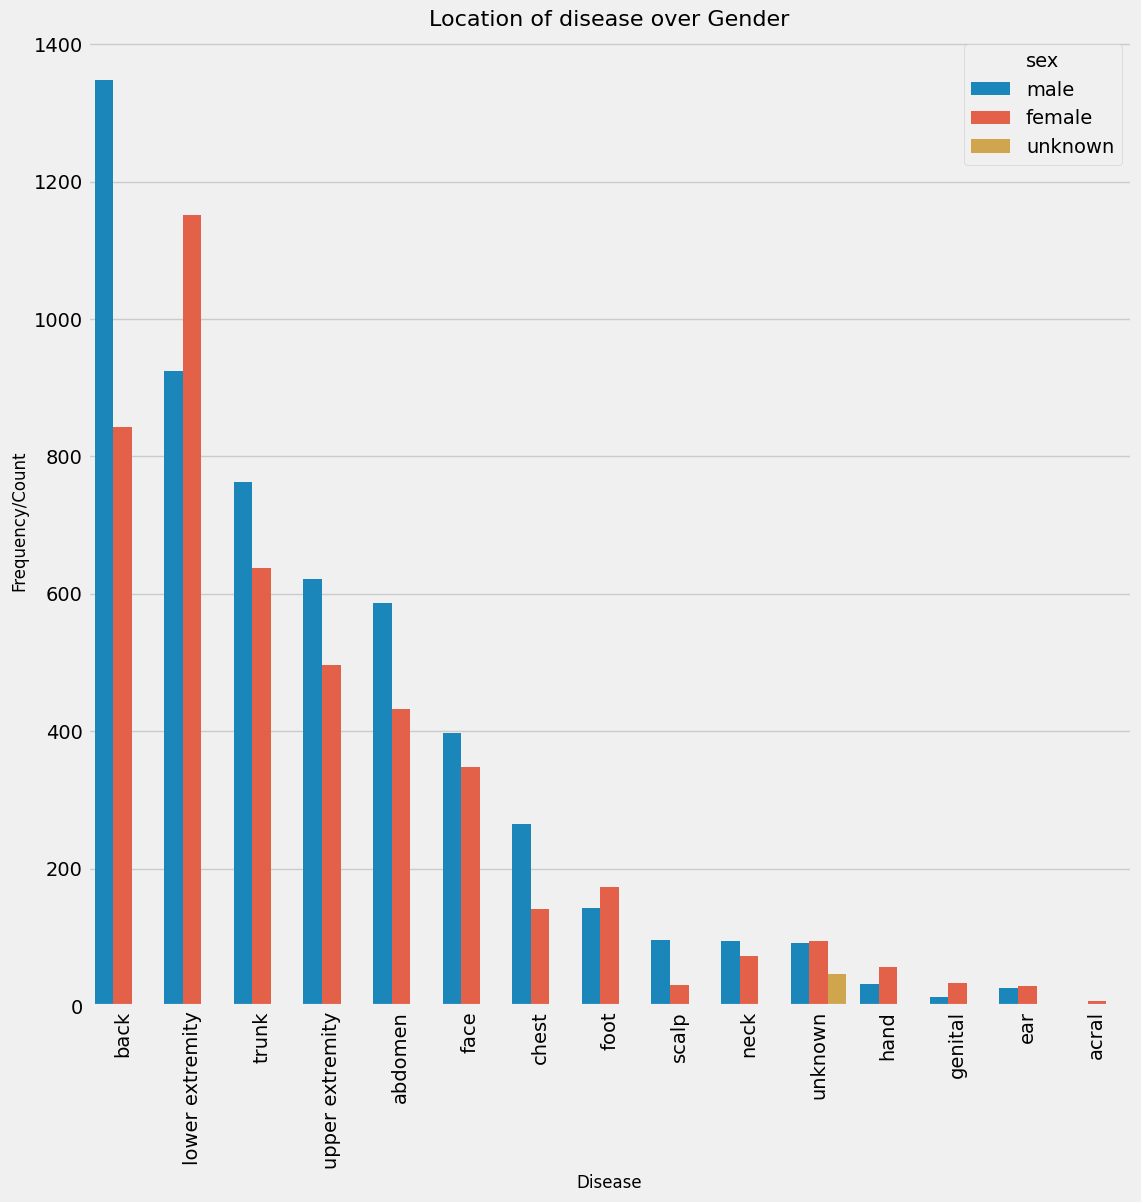

In [62]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling

In [63]:
oversample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x, y)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [64]:
x_resampled = np.array(x_resampled).reshape(-1, 28, 28, 3)
print('Shape of x after oversampling and reshaping:', x_resampled.shape)

Shape of x after oversampling and reshaping: (46935, 28, 28, 3)


C:\Users\User\AppData\Local\Temp\ipykernel_12072\3515488337.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


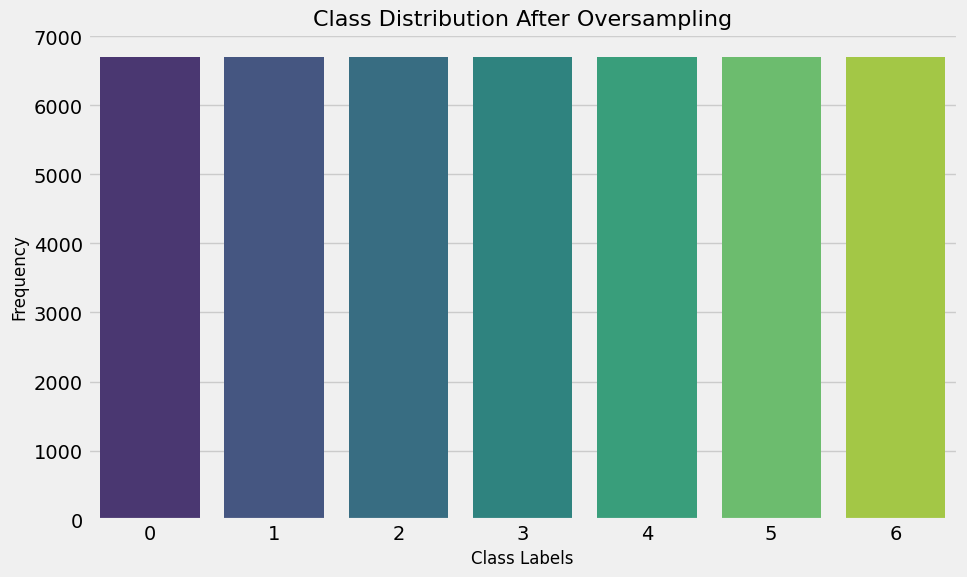

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the resampled data
resampled_df = pd.DataFrame({'label': y_resampled})

# Count the occurrences of each class
class_counts = resampled_df['label'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution After Oversampling', size=16)
plt.xlabel('Class Labels', size=12)
plt.ylabel('Frequency', size=12)
plt.show()

# Standardization of Data

In [66]:
mean = np.mean(x_resampled)
std = np.std(x_resampled)
x_resampled = (x_resampled - mean) / std

# Splitting Data

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=1
)

print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


# Model Training

In [68]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

model = Sequential([
    Input(shape=(28, 28, 3)),  # Adjusted input shape to match data
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
callback = ModelCheckpoint(
    filepath='best_model.keras',  
    monitor='val_accuracy',       
    mode='max',
    save_best_only=True,
    verbose=1
)

In [70]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [71]:
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=20,
    callbacks=[callback],
)

model.save('final_model.h5')
print("Saved 'final_model.h5'")

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.73036, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4275 - loss: 1.4307 - val_accuracy: 0.7304 - val_loss: 0.7510
Epoch 2/20

Epoch 2: val_accuracy improved from 0.73036 to 0.85047, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7606 - loss: 0.6521 - val_accuracy: 0.8505 - val_loss: 0.4062
Epoch 3/20

Epoch 3: val_accuracy improved from 0.85047 to 0.85726, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8681 - loss: 0.3521 - val_accuracy: 0.8573 - val_loss: 0.3720
Epoch 4/20

Epoch 4: val_accuracy improved from 0.85726 to 0.92317, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8994 - loss: 0.2715 - val_accuracy: 0.9232 - val_loss: 0.2218
Epoch 5/20

Epoch 5: val_accuracy improved from 0.92317 to 0.93262, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 4

Saved 'final_model.h5'


In [72]:
np.save('mean.npy', mean)
np.save('std.npy', std)

# Plot Accuracy and Loss

In [73]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

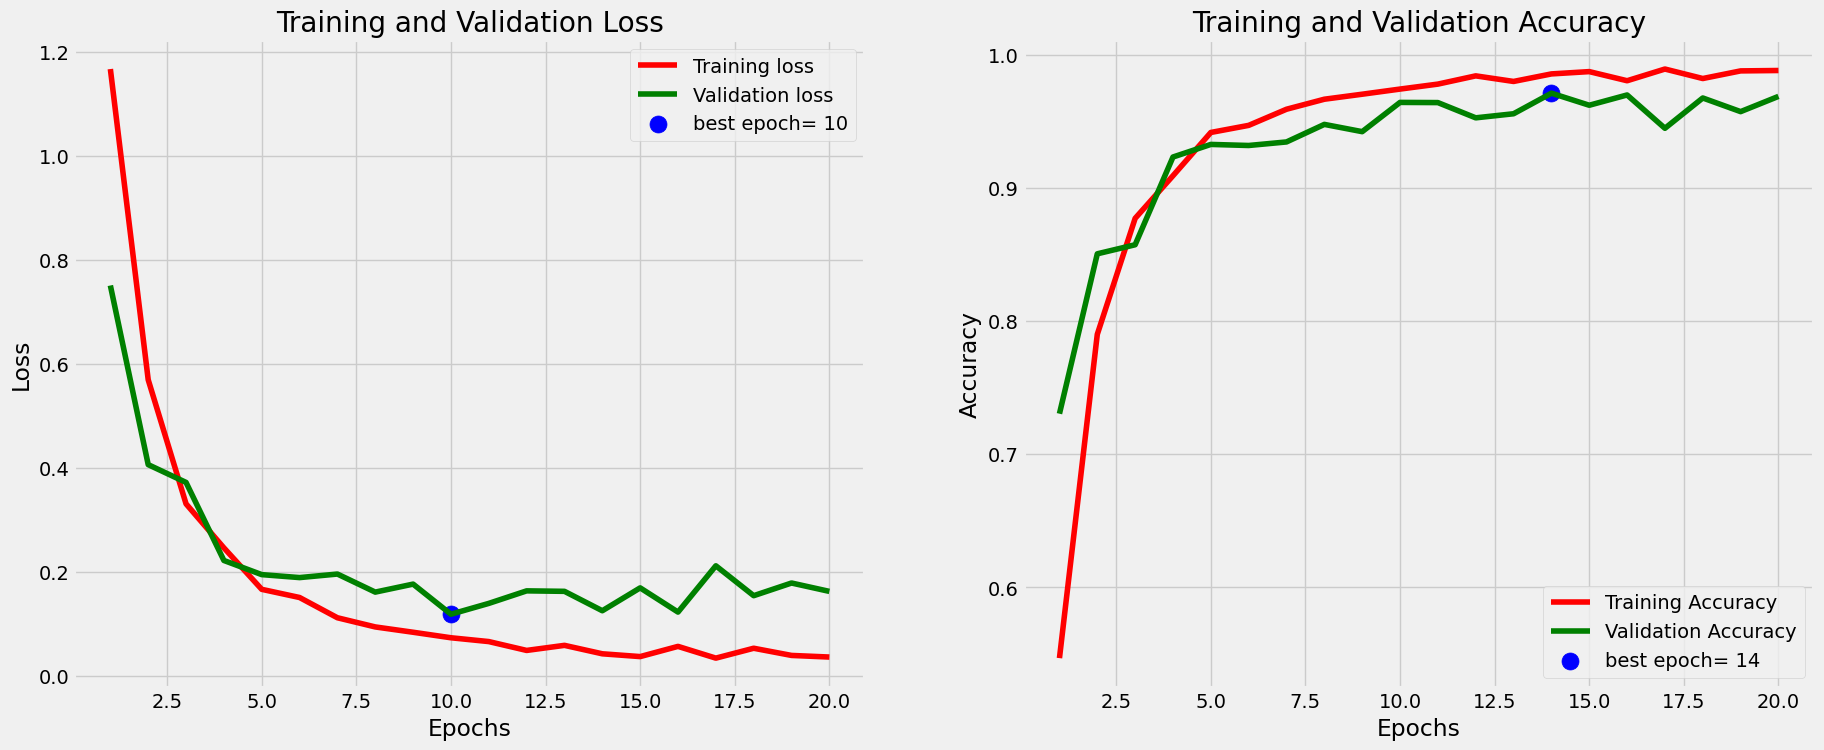

In [74]:
plot_training(history)

In [75]:
train_score = model.evaluate(X_train, Y_train, verbose= 1)
test_score = model.evaluate(X_test, Y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1174/1174 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9947 - loss: 0.0169
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1765 
Train Loss:  0.042979754507541656
Train Accuracy:  0.9903323650360107
--------------------
Test Loss:  0.16527190804481506
Test Accuracy:  0.9671886563301086


# Confusion Matrix

In [76]:
y_true = np.array(Y_test)
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

if y_true.ndim == 1:
    pass
else:
    y_true = np.argmax(y_true, axis=1)

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [77]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}
classes_labels = [v[0] for v in classes.values()]  # Get the first value of each tuple in `classes`

# classes_labels = []
# for key in classes.keys():
#     classes_labels.append(key)

print(classes_labels)

['nv', 'mel', 'bkl', 'bcc', 'vasc', 'akiec', 'df']


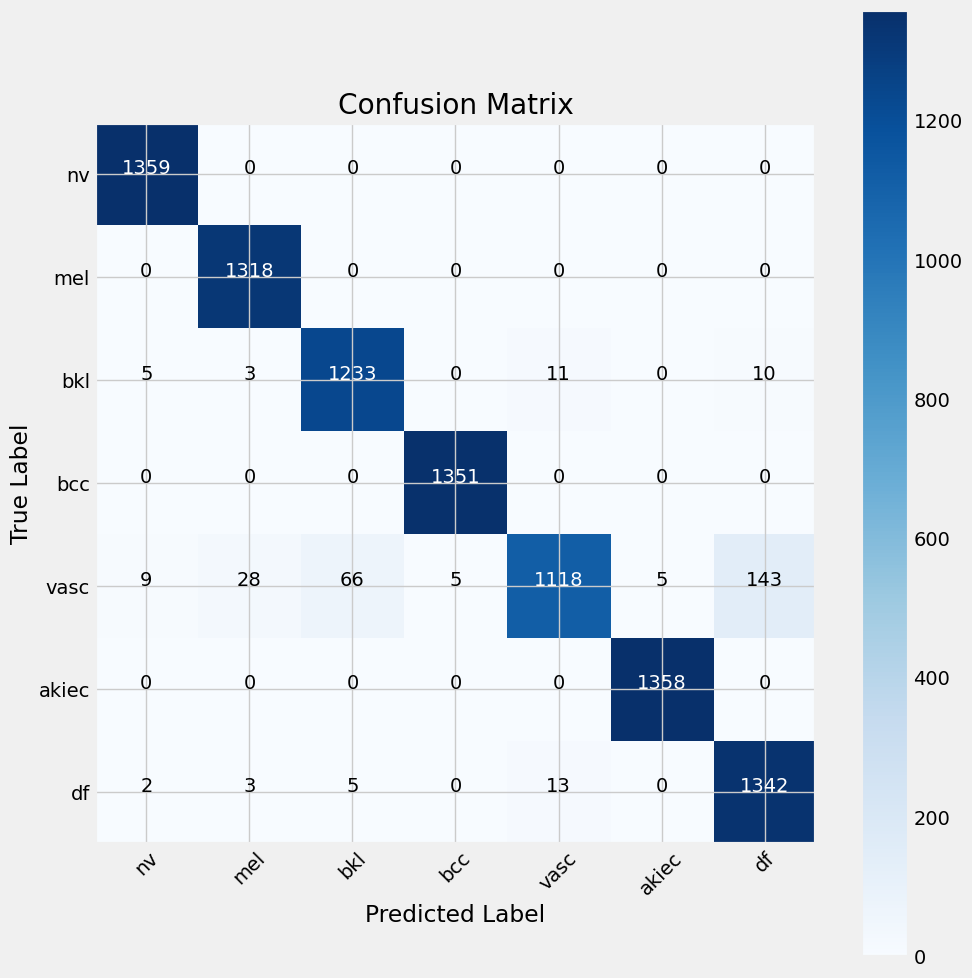

In [78]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Confusion matrix calculation
cm = confusion_matrix(y_true, y_pred, labels=sorted(classes.keys()))

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks for the labels
tick_marks = np.arange(len(classes_labels))
plt.xticks(tick_marks, classes_labels, rotation=45)
plt.yticks(tick_marks, classes_labels)

# Add text annotations for the matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

# Final layout and labels
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Classification Report

In [80]:
from sklearn.metrics import classification_report

# Example: `y_true` are true labels, and `y_pred` are predicted labels
report = classification_report(y_true, y_pred, target_names=classes_labels)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          nv       0.99      1.00      0.99      1359
         mel       0.97      1.00      0.99      1318
         bkl       0.95      0.98      0.96      1262
         bcc       1.00      1.00      1.00      1351
        vasc       0.98      0.81      0.89      1374
       akiec       1.00      1.00      1.00      1358
          df       0.90      0.98      0.94      1365

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387



# Model Inference

Image: ISIC_0026006.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------
Image: ISIC_0025850.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------
Image: ISIC_0026223.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 0.9990
----------------------------------------
Image: ISIC_0026291.jpg
Actual Class: bkl
Predicted Class: bkl
Confidence: 1.0000
----------------------------------------
Image: ISIC_0025528.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------
Image: ISIC_0024399.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------
Image: ISIC_0026476.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------
Image: ISIC_0025146.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 0.9899
----------------------------------------
Image: ISIC_0025189.jpg
Actual

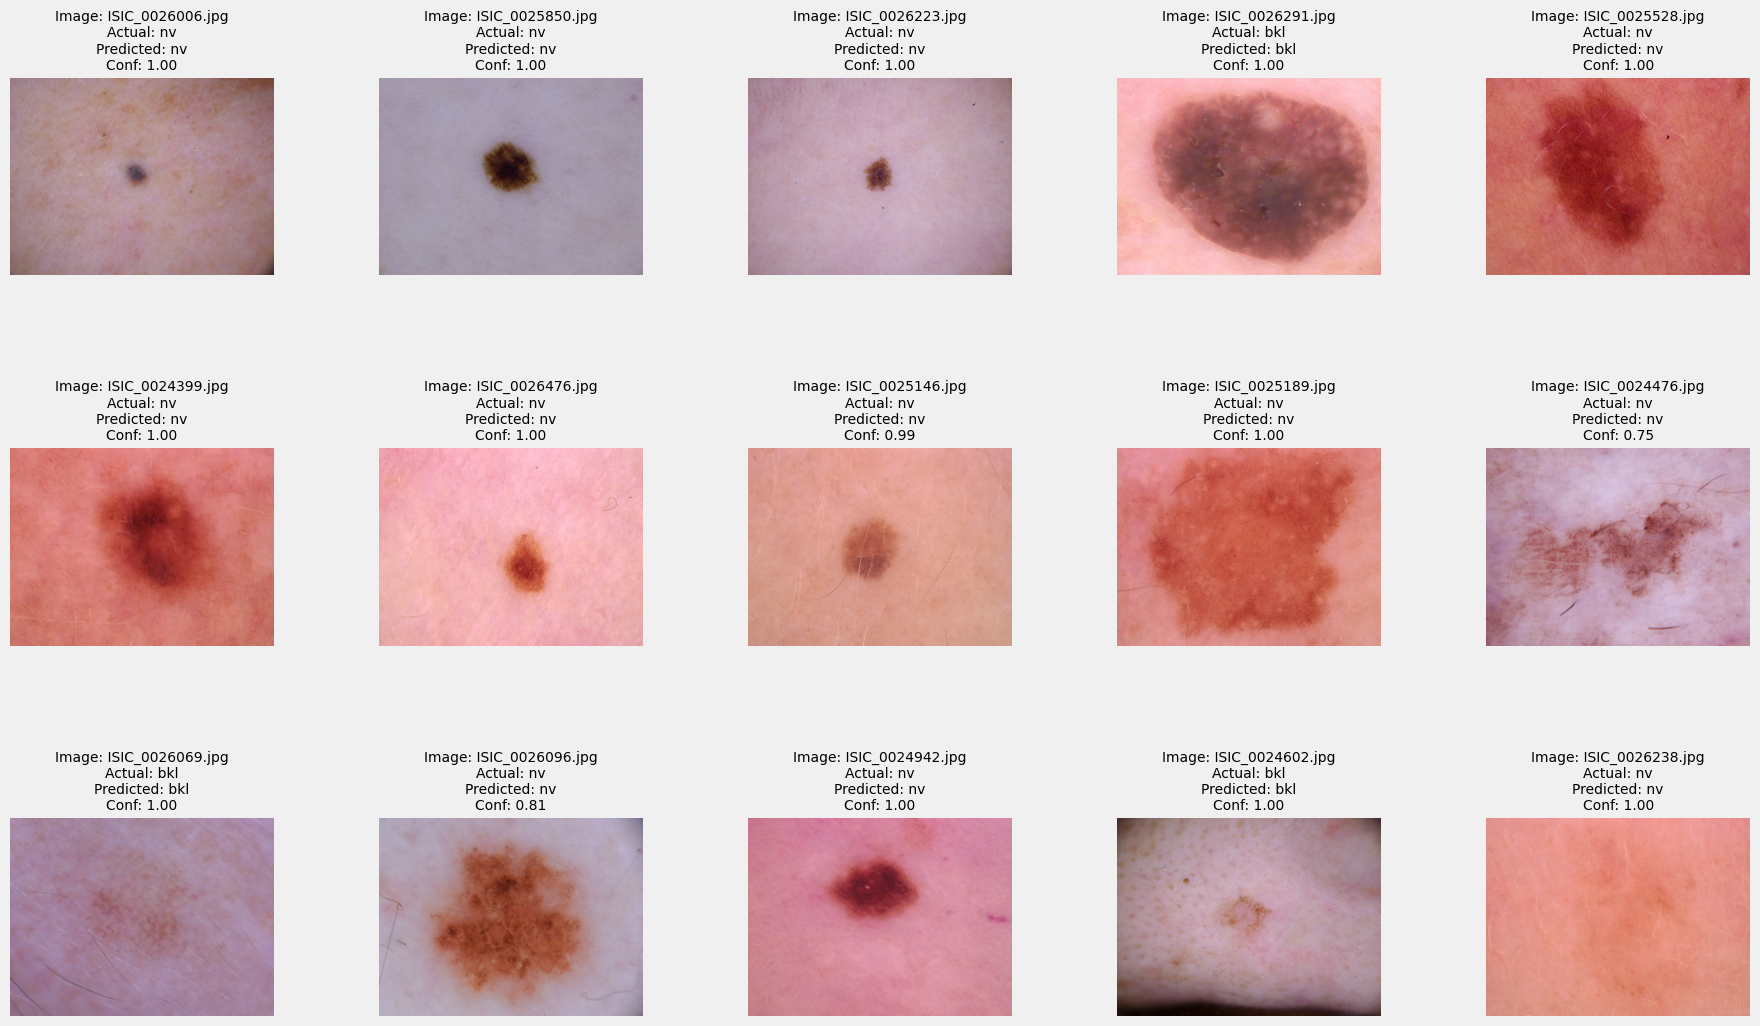

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
label_dict = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'nv',
    5: 'vas',
    6: 'mel'
}
model = tf.keras.models.load_model('final_model.h5')
# Ensure this filename matches your trained model
mean = np.load('mean.npy')
std = np.load('std.npy')
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure image has 3 channels
    image = image.resize((28, 28))  # PIL uses (width, height)
    image = np.asarray(image)
    image = (image - mean) / std  # Standardize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_random_images(image_dir, metadata_path, num_images=15):
    # Ensure that num_images matches the 5x3 grid (5 columns x 3 rows = 15 images)
    assert num_images == 15, "For a 5x3 grid, num_images must be 15."
    
    # Collect all image paths
    all_files = [os.path.join(image_dir, file_name) for file_name in os.listdir(image_dir) if file_name.endswith('.jpg') or file_name.endswith('.png')]
    
    # Randomly select images
    selected_files = np.random.choice(all_files, num_images, replace=False)
    
    # Load metadata
    metadata = pd.read_csv(metadata_path)

    # Create 5x3 grid
    nrows, ncols = 3, 5  # 5 columns and 3 rows
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12))  # Adjust figsize for better spacing

    # Flatten axes for easier indexing
    axes = axes.flatten()

    for i, file_path in enumerate(selected_files):
        image_name = os.path.basename(file_path)
        
        # Get the actual class from metadata
        actual_class = metadata[metadata['image_id'] == image_name.split('.')[0]]['dx'].values[0]
        
        # Preprocess the image
        processed_image = preprocess_image(file_path)
        
        # Predict the class
        predictions = model.predict(processed_image, verbose=0)
        confidence = np.max(predictions)
        
        predicted_class_idx = np.argmax(predictions, axis=1)[0]
        predicted_class_name = label_dict[predicted_class_idx]
        
        print(f"Image: {image_name}")
        print(f"Actual Class: {actual_class}")
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Confidence: {confidence:.4f}")
        print("-" * 40)
        
        # Display the image and title
        image = Image.open(file_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {image_name}\nActual: {actual_class}\nPredicted: {predicted_class_name}\nConf: {confidence:.2f}", fontsize=10)
        axes[i].axis('off')
    
    # Turn off unused axes (if any)
    for j in range(len(selected_files), len(axes)):
        axes[j].axis('off')

    # Adjust spacing between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Horizontal and vertical spacing
    plt.show()

predict_dir = "C:\\Users\\User\\Desktop\\IAT360_final_dataset\\HAM10000_images_part_1"
metadata_path = "C:\\Users\\User\\Desktop\\IAT360_final_dataset\\HAM10000_metadata.csv"
predict_random_images(predict_dir, metadata_path)